Kiley Delaney/kileyfd2/675040797
CS 598 Advanced Bayesian Modeling Assignment 2

In [12]:
install.packages("coda")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
install.packages("rjags")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("rjags"):
“installation of package ‘rjags’ had non-zero exit status”


# Problem 1

(a) The first prior formulation was

$θ_j$ | $α, β \sim$ Beta($α, β$)

$α, β \sim$ Expon(0.001)


(i)  Independently simulate 1000 pairs (α, β) from their hyperprior, and
produce a scatterplot of log(β) versus log(α).

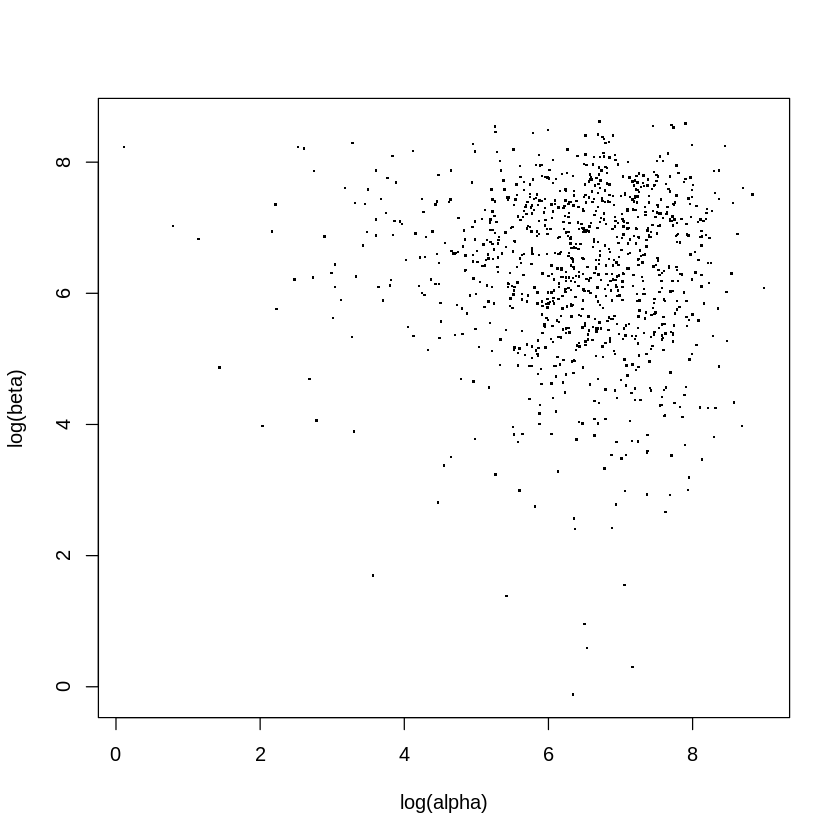

In [ ]:
alpha <- rexp(n = 1000, rate =0.001)
beta <- rexp(n = 1000, rate =0.001)
plot(log(alpha), log(beta), pch=".", cex=2)

(ii) Using the simulated pairs (α, β), forward-simulate $θ_1$, and produce a
histogram of the result (an approximation of its marginal prior).

(b) The second prior formulation was



# Problem 2

(a) Specify improper densities that the proper hyperpriors given above are
apparently intended to approximate. (Which parameters are the hyperparameters?)

The hyperparameters are as follows:

$ψ_0 ∼ $ N($0, 1000^2$)

$\sigma_0 ∼ $ U($0, 1000$)

(b) Draw a directed acyclic graph (DAG) appropriate for this model. (Use the
notation introduced in lecture, including “plates.”) You may draw it neatly by hand or use software.

Graph image TK

(c) Using the template asgn2template.bug provided on the course website, form a
JAGS model statement (consistent with your DAG). Show your JAGS code.
[Remember: JAGS “dnorm” uses precisions, not variance]

In [15]:
library(rjags)

ERROR: Error in library(rjags): there is no package called ‘rjags’


In [17]:
'model {
  for (j in 1:12) {
    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)
    psi[j] ~ dnorm(psi0, 1/sigma0^2)
  }

  psi0 ~ dnorm(0,1/1000^2)
  sigma0 ~ dunif(0,1000)

  sigmasq0 <- sigma0^2
}'

[1] "model {\n  for (j in 1:12) {\n    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)\n    psi[j] ~ dnorm(psi0, 1/sigma0^2)\n  }\n\n  psi0 ~ dnorm(0,1/1000^2)\n  sigma0 ~ dunif(0,1000)\n\n  sigmasq0 <- sigma0^2\n}"

(d) Set up any R (rjags) statements appropriate for creating a JAGS model. Show
your R code, and also show (print) the R list or data frame that you are passing to JAGS. Double check that the variable names in the list or data frame exactly match the corresponding names in your JAGS model, and double check your numbers.

In [18]:
d <- read.table("thenumbers.txt", header=FALSE)
colnames(d) <- c("psi", "sigma")

In [19]:
d

psi,sigma,NA,NA,NA,NA,NA,NA,NA
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1.055,0.373,5,1.068,0.471,9,0.507,0.186
2,-0.097,0.116,6,-0.025,0.120,10,0.000,0.328
3,0.626,0.229,7,-0.117,0.220,11,0.385,0.206
4,0.017,0.117,8,-0.381,0.239,12,0.405,0.254


(e) Run at least 10,000 iterations of burn-in, then 100,000 iterations to use for inference. For both $ψ_0$ and $σ^2_0$ (not $σ_0$), produce a posterior numerical summary and also graphical estimates of the posterior densities. Explicitly give the approximations of their posterior expected values, posterior standard deviations, and 95% central posterior intervals. (Just showing R output is not enough!)

(f) Suppose a new case-control study is to be performed, and assume that its log-odds standard error (new σ) will be 0.125. Assume the ψ for the new study is exchangeable with those for the previous studies (under the Bayesian model).


Use at least 10,000 iterations of burn-in, and 100,000 for inference as before.

[i] Re-draw your DAG, adding new nodes to represent the new $\hat{ψ}$ and new ψ.

[ii] s] Correspondingly modify your JAGS model to answer the following parts.
Show the modified JAGS and R code and output that you used.

[iii] Approximate the posterior mean and posterior standard deviation, and
form an approximate 95% central posterior predictive interval for the estimated
log-odds ratio that the new study will obtain. (Remember, this new estimated
log-odds ratio will be the new $\hat{ψ}$, not the new ψ).

[iv] Approximate the posterior predictive probability that the new estimated
log-odds ratio will be at least twice its standard error, i.e., at least two standard errors (2σ) greater than zero. (This is roughly the posterior probability that the new study will find a statistically significant result, and in the positive direction.) Suggestion: Add an indicator variable to your JAGS model - one that equals 1 when the event occurs, and 0 otherwise. (What is its mean?)